<a href="https://colab.research.google.com/github/sejeong-park/Deeplearning_system/blob/main/l1_norm%2C_l2_norm_regularization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
sns.set(style='whitegrid')

In [2]:
def data_gen(no=20,var=15):
  rng=np.random.RandomState(1)
  x=var*rng.rand(no)
  X=x.reshape(-1,1)
  y=2*x-1+rng.rand(no)
  return X,y

In [3]:
X,y=data_gen(no=25,var=15)

In [9]:
def L1_regression(x, y, eta = 1e-2, alpha = 1, epochs = 20):
  m , n = x.shape
  x = np.concatenate((np.ones((m, 1)),x), axis= 1)
  w = np.random.randn(n+1, )
  cost_hist = []
  for i in range(epochs):
    error = x.dot(w) - y    
    L1_term = (alpha/2 * m) * np.sum(abs(w))
    J = (1/2 * m) *np.sum(error**2) + L1_term
    if np.sum(w)>0:
      dJ = 1/m * x.T.dot(error) + alpha
    else:
      dJ = 1/m * x.T.dot(error) - alpha
    w -= eta * dJ
    if i ==0 or i == epochs- 1:
      print('at {} epoch cost {}'.format(i, J))
    cost_hist.append(J)
  return w, cost_hist
    


at 0 epoch cost 46410.03523461436
at 9 epoch cost 33.66124296734881


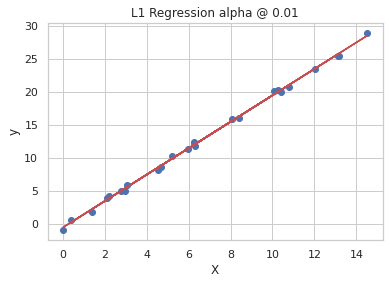

at 0 epoch cost 94339.48787819606
at 9 epoch cost 98.19289526491366


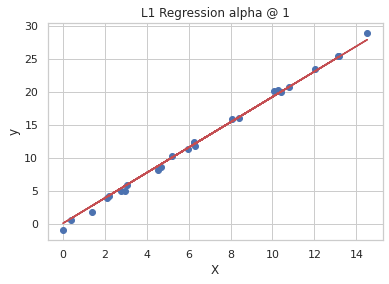

at 0 epoch cost 33880.32442052257
at 9 epoch cost 15499.359252100323


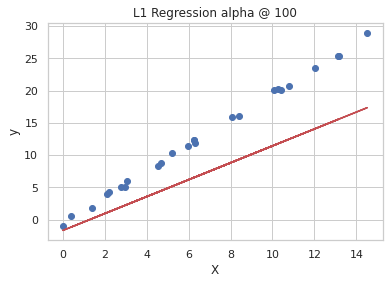

In [10]:
alpha=[0.01,1,100]

for alpha_ in alpha:
  weight,_ =L1_regression(X,y,eta=0.01,alpha=alpha_,epochs=10)
  fitted_line=np.dot(X,weight[1])+weight[0]
  plt.scatter(X,y)
  plt.plot(X,fitted_line,color='r')
  plt.xlabel("X")
  plt.ylabel("y") 
  plt.title("L1 Regression alpha @ {}".format(alpha_))
  plt.show()

In [11]:
def L2_regression(X,y,eta=0.01,alpha=1, epochs=20): # ㅣ2 norm
  m=np.shape(X)[0]
  n=np.shape(X)[1]

  X=np.concatenate((np.ones((m,1)),X),axis=1)
  W=np.random.rand(n+1,) #랜덤한 값 

  cost_hist=[]

  for iter_ in np.arange(epochs):
    error=X.dot(W)-y
    L2_term=(alpha/2*m)*np.sum(np.square(W)) #L2놈의 합을 루트를 앞으로 빼준형태
    J=(1/2*m)*np.sum(error**2)+L2_term # 원래는 error의 MSE까지 했을 텐데, L2 Term을 더해줘

    dJ=(1/m)*(X.T.dot(error)+alpha*W)
    W-=eta*dJ

    if iter_==0 or iter_==epochs-1:
      print("At {} iteration, cost is {}".format(iter_,J))

      cost_hist.append(J)

  return W,cost_hist

At 0 iteration, cost is 48972.203404228145
At 9 iteration, cost is 145.98271852504763


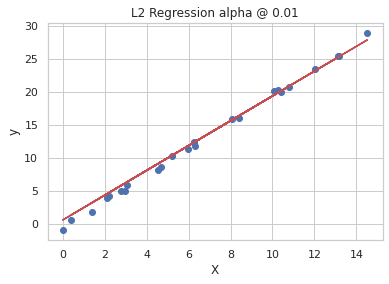

At 0 iteration, cost is 14640.072981656927
At 9 iteration, cost is 253.54814046464261


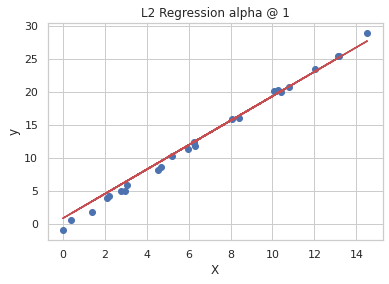

At 0 iteration, cost is 27286.467003799335
At 9 iteration, cost is 4468.642396391961


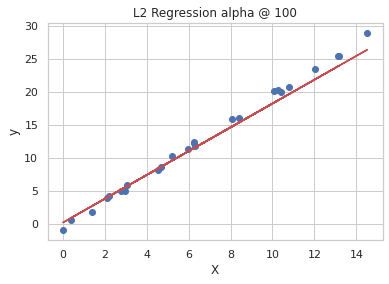

In [12]:
alpha=[0.01,1,100]

for alpha_ in alpha:
  weight,_ =L2_regression(X,y,eta=0.01,alpha=alpha_,epochs=10)
  fitted_line=np.dot(X,weight[1])+weight[0]
  plt.scatter(X,y)
  plt.plot(X,fitted_line,color='r')
  plt.xlabel("X")
  plt.ylabel("y")  #나중에 연구발표할때 꼭 함수에 labeling 해주고 title 맞춰줘라.. 만점 받아라
  plt.title("L2 Regression alpha @ {}".format(alpha_))
  plt.show()